<a href="https://colab.research.google.com/github/AsiMrz/onlineMagazin_dataVisualization/blob/Users/Copy_of_MyPreject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Preject:**

Online marketing for an innovative online magazin in order to grow its subscriber base.

this Startup needs to have a better understanding of their user base.

they are sending you a sample of 50k of their users and expect you to answer basic exploratory questions on this dataset.

The company is currently investing heavily in online marketing channels in order to acquire subscribers. The marketing channels are Criteo, Facebook, Instagram, Adwords and some select Partners (grouped under the “Partner” category). Additionally, they offer a referral programme for their existing subscribers to invite their friends.

The core of their business model is offering interesting content so users acquire and retain a paid subscription. At the moment, subscriptions can be 1 Month, 3 Month, 6 Month and 12 Month long.


**Questions:**

There exist multiple ways of answering the same question. We are expecting you to explain which hypothesis you chose when giving your answers. 



In [0]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
#!pip3 install --upgrade seaborn cufflinks plotly
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime


In [0]:
main = pd.read_csv('https://raw.githubusercontent.com/aaronmcdaid/P2---Data-Analytics-With-Python/master/Berlin/WS%202019/5.%20Datasets/preject_datasets/main.csv')
main.head()


,user_id,birth_day,birth_month,birth_year,location,gender
0,1236805,26,2,1997,Los Angeles,M
1,2836384,13,2,1992,New York,M
2,5118289,28,2,1990,Rockville,F
3,2497066,12,2,2002,Middletown,M
4,2542664,5,2,1990,Weehawken,M


1. Who are our customers? (gender, age, where from?)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text major ticklabel objects>)

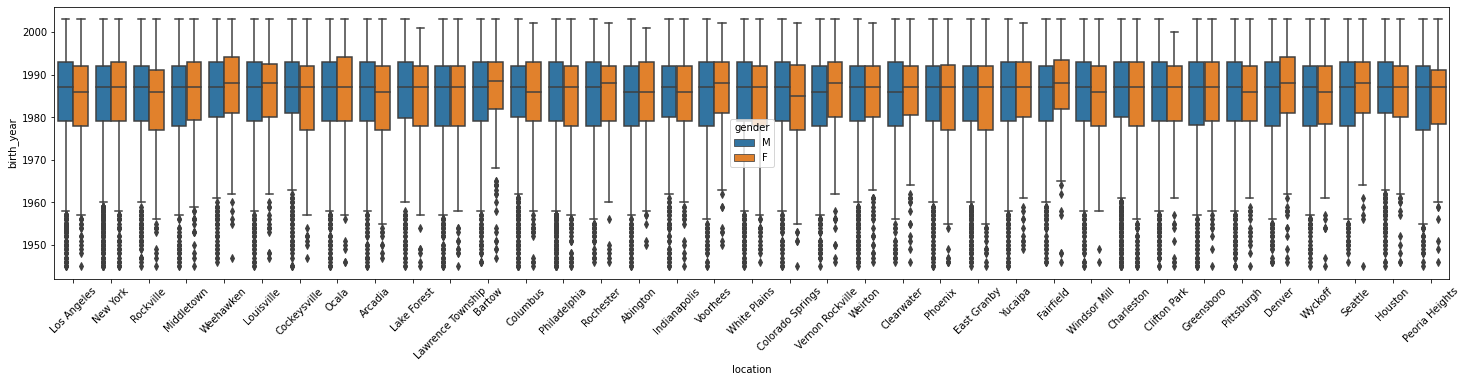

In [0]:
plt.figure(figsize=(25,5))
sns.boxplot(x='location', 
            y= 'birth_year', hue= 'gender' , data=main)
plt.xticks(rotation=45)

In [0]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      50000 non-null  int64 
 1   birth_day    50000 non-null  int64 
 2   birth_month  50000 non-null  int64 
 3   birth_year   50000 non-null  int64 
 4   location     49984 non-null  object
 5   gender       48979 non-null  object
dtypes: int64(4), object(2)
memory usage: 2.3+ MB


In [0]:
main.location.describe()

0    Los Angeles
1       New York
2      Rockville
3     Middletown
4      Weehawken
Name: location, dtype: object

In [0]:
location_aggregated = main[["location","user_id"]].groupby("location").agg("count")

In [0]:
location_aggregated

,user_id
location,
Abington,844
Arcadia,872
Bartow,978
Charleston,3420
Clearwater,833
Clifton Park,1528
Cockeysville,975
Colorado Springs,831
Columbus,1935


In [0]:
location_aggregated = location_aggregated.sort_values(by ="user_id", ascending=False)
location_aggregated.reset_index(inplace=True)

In [0]:
location_aggregated.head()

,location,user_id
0,Philadelphia,4247
1,New York,4158
2,Charleston,3420
3,Los Angeles,2732
4,East Granby,2652


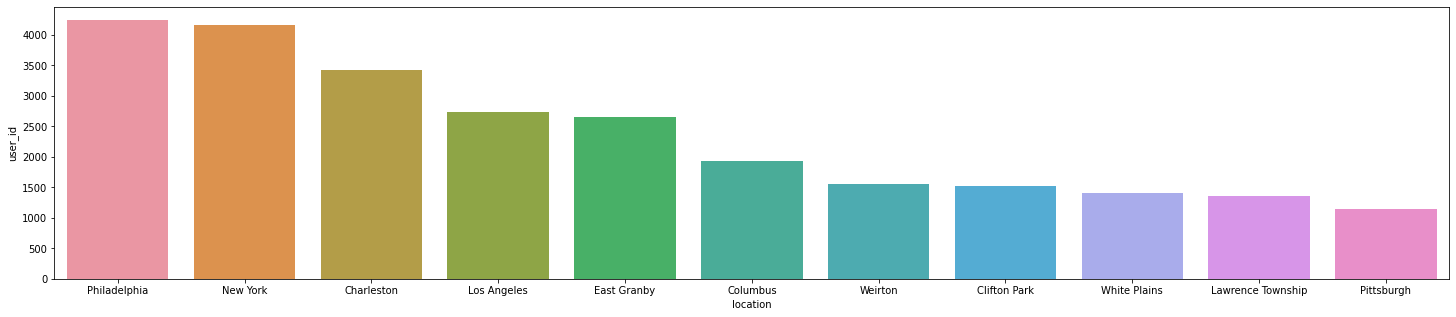

In [0]:
#how many from each location
plt.figure(figsize=(25,5))
sns.barplot(x="location",y ="user_id",  data=location_aggregated.loc[0:10,:])
#plt.xticks(rotation=45)


In [0]:
#the IQR birth
plt.figure(figsize=(25,5))
b_yearIQR = birth_year.quantile(0.75) - birth_year.quantile(0.25)
sns.barplot(x='b_yearIQR', hue= 'gender' , data=main)
#plt.xticks(rotation=45)


NameError: ignored

<Figure size 1800x360 with 0 Axes>

2. Where and what are we selling the most? (locations, products)


In [0]:
#init
product = pd.read_csv('https://raw.githubusercontent.com/aaronmcdaid/P2---Data-Analytics-With-Python/master/Berlin/WS%202019/5.%20Datasets/preject_datasets/product.csv')
marketing_budget_split = {'Criteo':185000,'TV':30000,'Facebook':550000,'Adwords':40000,'Instagram':700000,'Partner':'25% Share of first subscription price with minimum of 5 euros'}
prices = {'1M':12.99,'3M':32.99,'6M':53.99,'12M':83.99}
product.head()



In [0]:
mainProduct = pd.concat([main, product])
mainProduct.head()

,user_id,birth_day,birth_month,birth_year,location,gender,product,intervals,purchase_date,voucher
0,1236805,26.0,2.0,1997.0,Los Angeles,M,NaN,NaN,NaN,NaN
1,2836384,13.0,2.0,1992.0,New York,M,NaN,NaN,NaN,NaN
2,5118289,28.0,2.0,1990.0,Rockville,F,NaN,NaN,NaN,NaN
3,2497066,12.0,2.0,2002.0,Middletown,M,NaN,NaN,NaN,NaN
4,2542664,5.0,2.0,1990.0,Weehawken,M,NaN,NaN,NaN,NaN


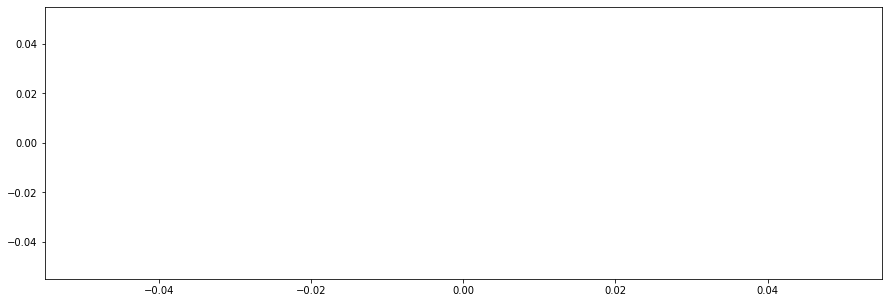

In [0]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="product", y="location", data=mainProduct)

3. Can you identify some reading patterns? (times a day, days a week, how many times a user goes back to an article, most liked/read articles)

In [0]:
user_attribution = pd.read_csv('https://raw.githubusercontent.com/aaronmcdaid/P2---Data-Analytics-With-Python/master/Berlin/WS%202019/5.%20Datasets/preject_datasets/attribution.csv')
user_article = pd.read_csv('https://raw.githubusercontent.com/aaronmcdaid/P2---Data-Analytics-With-Python/master/Berlin/WS%202019/5.%20Datasets/preject_datasets/user_article.csv')
user_article.head()

,datetime,liked,user_id,article_info
0,2018-11-19 7:1,1,744391,"[5, 51898, 9]"
1,2018-9-25 13:54,1,3069240,"[5, 52508, 18]"
2,2018-9-15 7:58,1,4176029,"[2, 28993, 21]"
3,2018-9-19 18:4,1,2051762,"[3, 36094, 17]"
4,2018-10-14 18:39,1,2265406,"[5, 51798, 19]"


In [0]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="datetime", data=user_article)

ValueError: ignored

<Figure size 1080x360 with 0 Axes>


4. What is the correlation between article reading length - liked - times read? 


In [0]:

User_attrib_artic = pd.concat([user_attribution, user_article])
User_attrib_artic.head()

,user_id,attribution,datetime,liked,article_info
0,1236805,Instagram,NaN,NaN,NaN
1,2836384,Partner,NaN,NaN,NaN
2,5118289,Partner,NaN,NaN,NaN
3,2497066,Facebook,NaN,NaN,NaN
4,2542664,Facebook,NaN,NaN,NaN


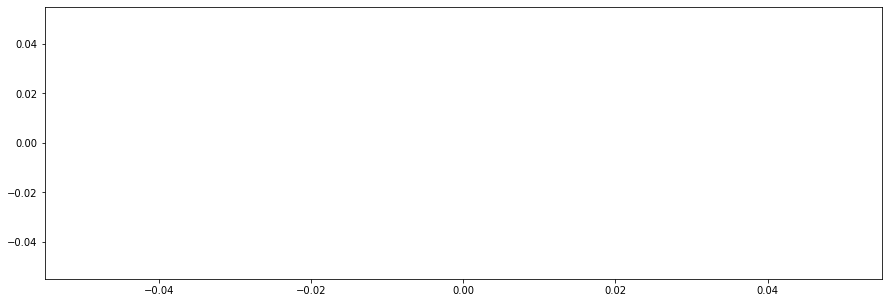

In [0]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="attribution", y="datetime", data=User_attrib_artic)

5. Bonus - Which marketing channels are performing well? 

Summarise your findings in a presentation aimed at the startup where you will tell them what you found and what would be your recommendations for them.

**Topics we cover:**
Import files onto pandas

*   Data frames & pandas
*   Missing values
*   Data manipulation (e.g creating bins/buckets eg Age groups)
*   Aggregations and joins
*   Visualizations (gender, age, location, promotion, product, Correlation between different fields)
*   Date-string functions
*   Analytics : approach a business dataset, what & how to visualize












